# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

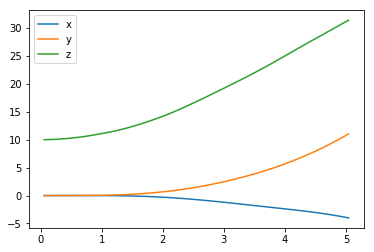

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

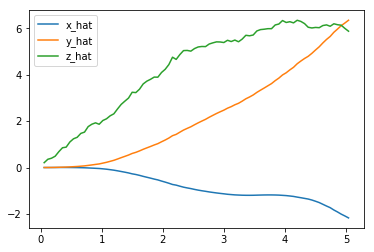

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

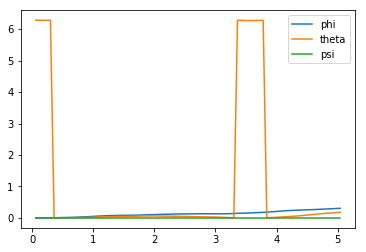

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

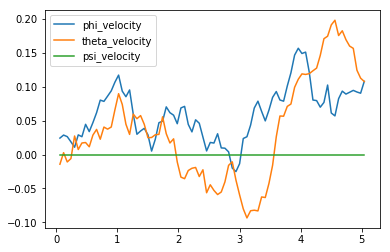

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

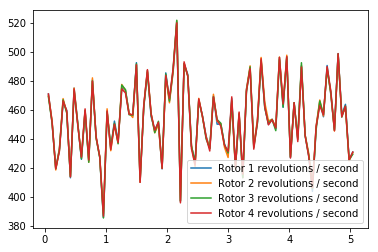

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -4.00620653  11.04475378  31.39871658   0.30498436   0.17671281   0.        ]
[-2.17112569  6.34705362  5.87467924]
[ 0.10800609  0.10776784  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.989 (best =   0.029), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## 1. Code

### 1.1. Running the Quadcopter Learning Model
The code below is designed in a modular way to make it easier to run multiple models and save the results. This will help to develop the model.
This function runs the model ("flying" the quadcopter) and saves the results data.

In [1]:
# Function to run the model and save the results data
import sys
import os
import csv
import numpy as np
from agents.agent import DDPG
from agents.agent import AdvancedDDPG
from task import Task
from task import Takeoff
from task import FlightTime

def fly_quadcopter(agent, task, num_episodes, filepath):
    best_reward = -1000    # Keep track for debug purposes
    mean_rewards = []      # Each entry is the mean reward per episode
    success_percentage = 0 # Count how many times the episode ends due to timeout 
                           # (rather than a crash or out of bounds) and write out every 100 episodes

    #For capturing and visualising resuts
    labels = ['time',                                            # index we plot everything against      
              'reward',                                          # reward
              'x', 'y', 'z',                                     # position vectors
              'phi', 'theta', 'psi',                             # euler angles ("roll", "pitch", "yaw" (flat rotation))
              'x_velocity', 'y_velocity', 'z_velocity',          # velocity vectors
              'phi_velocity', 'theta_velocity', 'psi_velocity',  # euler angular velocities
              'rotor_speed1', 'rotor_speed2',                    # 4 rotor speeds
              'rotor_speed3', 'rotor_speed4']

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        # Initialise tracking data for this episode
        results = {x : [] for x in labels}
        rewards_per_episode = []
        output_filename = "episode" + str(i_episode) + ".txt"
        file_output = os.path.join(filepath, output_filename)
        with open(file_output, 'w') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(labels)
            while True:
                action = agent.act(state)
                next_state, reward, done = task.step(action)
                agent.step(action, reward, next_state, done)
                state = next_state
                best_reward = max(best_reward, reward)
                rewards_per_episode.append(reward)
                to_write = [task.sim.time] \
                         + [reward]\
                         + list(task.sim.pose)\
                         + list(task.sim.v)\
                         + list(task.sim.angular_v)\
                         + list(action) # Rotor speeds
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
                if done:
                    mean_reward = np.mean(rewards_per_episode)
                    mean_rewards.append(mean_reward)
                    if task.sim.time >= task.sim.runtime:
                        success_percentage += 1
                    if i_episode % 100 == 0:
                        print ("Exceeded flight time target {:3d} times in the last 100 episodes!!)"
                               .format(success_percentage))
                        success_percentage = 0
                    print("\rEpisode = {:4d}, mean_reward = {:7.3f} (best_reward = {:7.3f})".format(
                        i_episode, mean_reward, best_reward), end="\r")  # [debug]
                    break
            sys.stdout.flush()
    return mean_rewards


Using TensorFlow backend.


### 1.2. Visualising Quadcopter Flight Results
The following functions allow us to draw graphs to analyse the behaviour of the quadcopter (physical behaviour like position, velocity etc.) and the performance of the model (the mean value of rewards obtained in each episode).

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import os
from mpl_toolkits import mplot3d
%matplotlib inline
%pylab inline

# Helper function to plot graphs showing physical behaviour of the quadcopter in an episode
def plot_graph(dataset, graphtitle, y_label, outputfile):
    dataset.set_index("time", inplace = True)
    dataset.plot(title=graphtitle)
    plt.xlabel('Time (s)')
    plt.ylabel(y_label)
    plt.show()
    plt.savefig(outputfile)
    
# Helper to handle setting up output paths for results
def setpaths(results_path, datasetname, episodes):
    final_results_file = 'episode'+str(episodes)+'.txt'
    final_results_path = os.path.join(results_path, datasetname)
    final_results_file_and_path = os.path.join(results_path, datasetname, final_results_file)
    mean_rewards_file_and_path = os.path.join(results_path, datasetname, 'mean_rewards.txt')
    return final_results_file, final_results_path, final_results_file_and_path, mean_rewards_file_and_path

# Function to plot a graph of the mean reward obtained in each episode to determine how well the system is learning.
def plot_mean_rewards(mean_rewards_file_and_path):
    mean_rewards = []
    with open(mean_rewards_file_and_path) as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            mean_rewards.append(row[0])
    mean_rewards = np.array(mean_rewards).astype(float64)
    fig, ax = plt.subplots()
    plt.plot(mean_rewards, label='Mean rewards', alpha=0.5)
    plt.title("Mean Reward Obtained in Each Episode")
    plt.legend()
    plt.show()
    outputpath = os.path.dirname(mean_rewards_file_and_path)
    plt.savefig(os.path.join(outputpath, 'mean_rewards.png'))

# Function to plot a series of graphs from a given file of raw output data for a single episode
def visualise_quadcopter(episode_datafile):
    # Set up the data subtables
    episode_data = pd.read_csv(episode_datafile)
    position_data = episode_data[["time", "x", "y", "z"]]
    velocity_data = episode_data[["time", "x_velocity", "y_velocity", "z_velocity"]]
    angle_data = episode_data[["time", "phi", "theta", "psi"]]
    angular_velocity_data = episode_data[["time", "phi_velocity", "theta_velocity", "psi_velocity"]]
    rotor_speed_data = episode_data[["time", "rotor_speed1", "rotor_speed2", "rotor_speed3", "rotor_speed4"]]
    reward_data = episode_data[["time", "reward"]]
    # Plot the graphs
    outputpath = os.path.dirname(episode_datafile)
    # First plot a 3D visualisation of the flightpath
    flightpath = plt.figure().gca(projection='3d')
    flightpath.plot(position_data.loc[:, 'x'].values, 
                       position_data.loc[:, 'y'].values, 
                       position_data.loc[:, 'z'].values)
    plt.title("Three Dimensional Visualisation of Flight Path")
    flightpath.set_xlabel('x (m)')
    flightpath.set_ylabel('y (m)')
    flightpath.set_zlabel('z (m)')
    plt.show()
    plt.savefig(os.path.join(outputpath, 'flightpath.png'))
    
    # Now plot all the physical measurements
    plot_graph(position_data,
               'Position',
               'Displacement (m)',
               os.path.join(outputpath, 'position.png'))
    plot_graph(velocity_data,
               'Velocity',
               'Velocity (m/s)',
               os.path.join(outputpath, 'velocity.png'))
    plot_graph(angle_data,
               'Angular Orientation',
               'Angle (radians)',
               os.path.join(outputpath, 'angle.png'))
    plot_graph(angular_velocity_data,
               'Angular Velocity',
               'Angular velocity (radians/s)',
               os.path.join(outputpath, 'angular_velocity.png'))
    plot_graph(rotor_speed_data,
               'Rotor Speed',
               'Rotor Speed (revolutions/s)',
               os.path.join(outputpath, 'rotor_speed.png'))
    plot_graph(reward_data,
               'Reward',
               'Reward',
               os.path.join(outputpath, 'reward.png'))
    

Populating the interactive namespace from numpy and matplotlib


## 2. Developing the Model

### 2.1. Approach to the Problem
Training a reinforcement learning agent to master a task as intended can be a difficult task. There are several important and related parts to develop including the reward function, the model architecture, and the hyperparameters. For these reasons, this project will take a step-by-step approach, developing the task and the model from a simple start to a more complex final system. Sections 2.2. and 2.3. below are **NOT** the final model and task - they are just supporting development. The final model and task are in section [2.4. Improved Model and Flight Time Task](#2.4.-Improved-Model-and-Flight-Time-Task) below.

### 2.2. Simple Model - Before Development and Tuning
In this part we run the model created with the DDPG Actor-Critic template code with minimal changes (just enough to get the code to run reasonably). See the code in classes DDPG(), Actor() and Critic(). Replay buffer and Ornstein-Uhlenbeck noise are used (also from the template code, classes ReplayBuffer() and OUNoise().). The task is the provided template task (unchanged) which has a very simple reward function based on target position (class Task()). No hyperparameters have been tuned in this run and the architecture of the neural networks in the Actor and Critic are unchanged. The purpose of this is to get an initial understanding of how the quadcopter behaves with this model, and use that to develop intuition on how to improve it.
Later, we will use these classes to develop more specialised and improved child classes.
Note that the results and graphs files are written to directory results/simple.

In [12]:
# Initialise data to pass to the task
num_episodes = 100
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 10.])
runtime = 5.
task = Task(target_pos=target_pos)
agent = DDPG(task)

# Set results paths
# Run this before executing fly_quadcopter (to write data files) 
# and also before executing visualise_quadcopter() and plot_mean_rewards() (to read the data files)
# Writes to/reads from directory path results/simple
results_path = 'results'
datasetname = 'simple'
final_results_file, \
final_results_path, \
final_results_file_and_path, \
mean_rewards_file_and_path = setpaths(results_path, datasetname, num_episodes)

In [13]:
# Fly! This step will regenerate (and overwrite) existing episode results files.
# Writes to directory path results/simple
mean_rewards = fly_quadcopter(agent, task, num_episodes, final_results_path)
with open(mean_rewards_file_and_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(mean_rewards)):
        towrite = mean_rewards[i]
        writer.writerow([towrite])

Exceeded flight time target   0 times in the last 100 episodes!!)


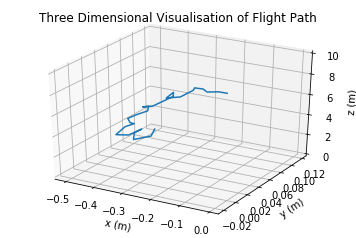

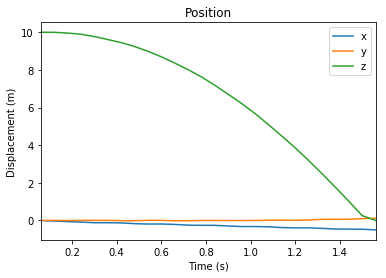

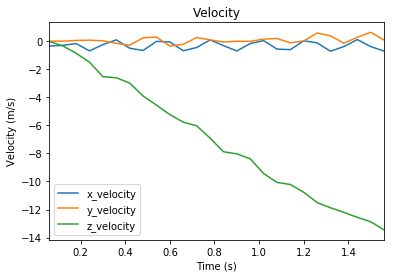

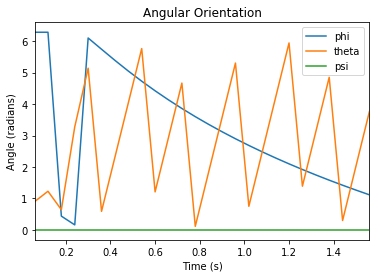

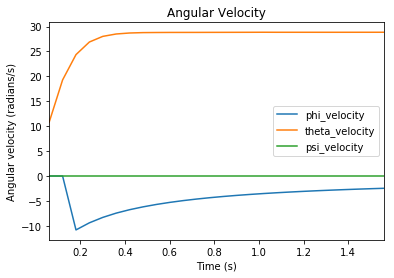

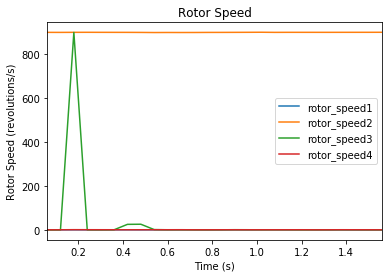

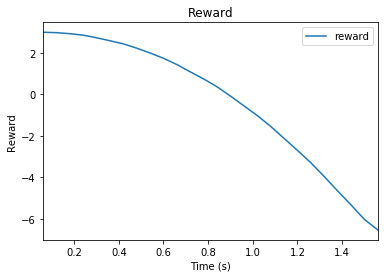

In [14]:
# Visualise the motion of the quadcopter.
# Take data from the last episode (there is a good chance this is amongst the best examples).
visualise_quadcopter(final_results_file_and_path)

# Or to visualise a specific episode use something like this:
#visualise_quadcopter('results/simple/episode40.txt')

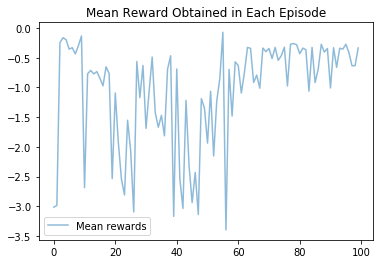

In [15]:
# Plot a graph of the mean reward obtained in each episode to determine how well the system is learning.
plot_mean_rewards(mean_rewards_file_and_path)

#### Observations
* Quadcopter usually falls from initial position to crash into the ground
* It moves a bit in the x y plane (parallel to ground)
* It does not keep a constant angular orientation (it rolls, pitches and sometimes spins)
* Rotor speeds are often very different (sometimes one or two rotors never activate)
* The model does not seem to learn (rewards do not increase with time)

### 2.3. Simple Take Off Task
The first aim is to make a simple task (just take off from the ground) with a simple reward function that does the following:
* small penalty at every action
* penalty for going below a height of 10m
* reward for any height greater than 10m (greater height leading to greater reward)
* reward for positive vertical velocity within a range of values

This will not be the final task for the project, but an intermediate step to see how the simple model behaves. This task is defined in class Takeoff() which is a child class of Task(). The agent is unchanged from the first step (classes DDPG(), Actor() and Critic()). This will not be a high-performing system because it has not been developed or tuned, but that is acceptable for now because the aim is to prove the system works (at least to some extent) rather than reach a high performance level.
All the relationships in the reward function are linear and simple with the intention that even the simple model provided in the template DDPG system can learn the task.
Results are written to directory results/takeoff.

In [3]:
# Initialise data to pass to the task
num_episodes = 300
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 30.])
runtime = 10.
task = Takeoff(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task)

# Set results paths
# Run this before executing fly_quadcopter (to write data files) 
# and also before executing visualise_quadcopter() and plot_mean_rewards() (to read the data files)
# Sets file path to read/write to be results/takeoff
results_path = 'results'
datasetname = 'takeoff'
final_results_file, \
final_results_path, \
final_results_file_and_path, \
mean_rewards_file_and_path = setpaths(results_path, datasetname, num_episodes)

In [4]:
# Fly!
# This step will regenerate (and overwrite) existing episode results files.
# Writes to directory path results/takeoff
mean_rewards = fly_quadcopter(agent, task, num_episodes, final_results_path)
with open(mean_rewards_file_and_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(mean_rewards)):
        towrite = mean_rewards[i]
        writer.writerow([towrite])

Exceeded flight time target   1 times in the last 100 episodes!!)
Exceeded flight time target  15 times in the last 100 episodes!!)
Exceeded flight time target  19 times in the last 100 episodes!!)


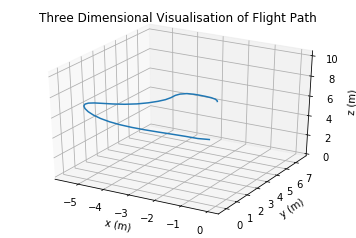

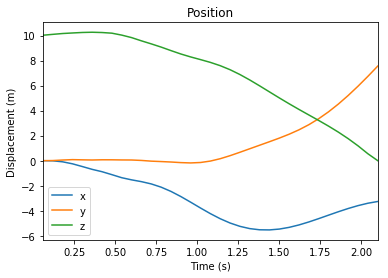

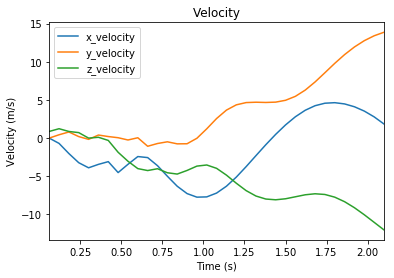

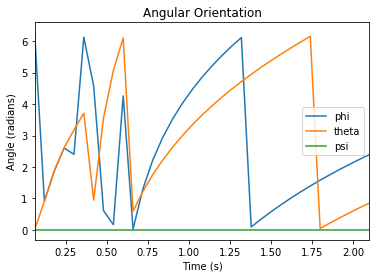

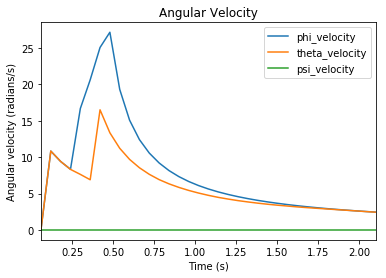

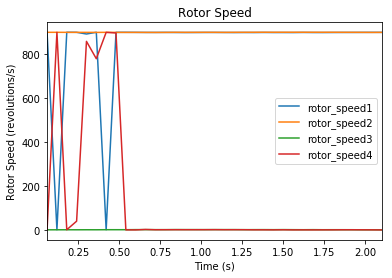

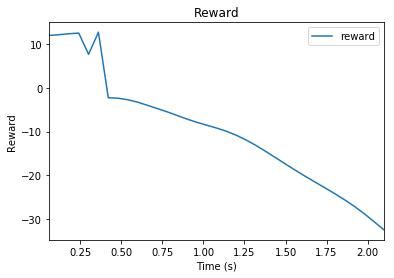

In [5]:
# Visualise the motion of the quadcopter.
# Take data from the last episode (there is a good chance this is amongst the best examples).
visualise_quadcopter(final_results_file_and_path)
# Or to visualise a specific episode use something like this:
#visualise_quadcopter('results/takeoff/episode40.txt')

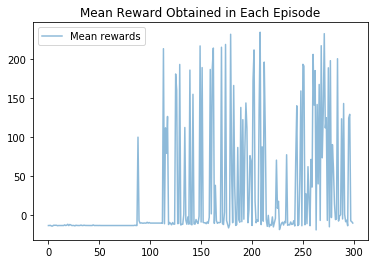

In [6]:
# Plot the mean reward in each episode
plot_mean_rewards(mean_rewards_file_and_path)

#### Observations
* This agent and model sometimes learns and sometimes doesn't. This particular run seems to show some signs of learning but it is very unstable. The mean rewards per episode has a high variability.
* There are several problems with the quadcopter's performance. Sometimes it crashes, sometimes it just goes up forever. It moves in the x-y plane and its angular position can vary significantly from zero. (This is consistent with the reward function which does not reward or penalise these factors.)
* Rotor speeds are often very different. The agent has learned to climb without using all of the rotors. This is an interesting strategy and sometimes works for this task but it may not be the best solution in a real physical system.
* The reward function used could be much better. It doesn't normalise rewards so the numbers can be very variable, and this might be causing some of the instability of the rewards earned each episode.
* For these reasons, we will improve the model and reward function in the next section.

### 2.4. Improved Model and Flight Time Task
The previous section showed some limited learning but there were definite problems with the solution. In this section we develop the model to give improved performance on a more refined task. This involves changes to:
 * The task (class FlightTime())
 * The agent (child classes AdvancedDDPG(), AdvancedActor(), AdvancedCritic()). This involves changes to the neural network architectures and the hyperparameters.
 
 Both the network and the task are discussed in the questions at the end of this notebook.
 Results for this section are written to directory path results/flighttime.

In [3]:
# Initialise data to pass to the task
num_episodes = 1000
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 100.])
runtime = 10.
task = FlightTime(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = AdvancedDDPG(task, gamma = 0.99, exploration_sigma = 0.2, tau=0.001, buffer_size=1000000)
# The AdvancedDDPG() calss uses AdvancedCritic() and AdvancedActor() classes.
# These will print out the full Keras model summary below.

# Set results paths
# Run this before executing fly_quadcopter (to write data files) 
# and also before executing visualise_quadcopter() and plot_mean_rewards() (to read the data files)
# Sets file path to read/write to be results/flighttime.
results_path = 'results'
datasetname = 'flighttime'
final_results_file, \
final_results_path, \
final_results_file_and_path, \
mean_rewards_file_and_path = setpaths(results_path, datasetname, num_episodes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 400)               7600      
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
raw_actions (Dense)          (None, 4)                 1204      
_________________________________________________________________
actions (Lambda)             (None, 4)                 0         
Total para

In [4]:
# Fly!
# This step will regenerate (and overwrite) existing episode results files.
# Writes to directory path results/flighttime
mean_rewards = fly_quadcopter(agent, task, num_episodes, final_results_path)

with open(mean_rewards_file_and_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(mean_rewards)):
        towrite = mean_rewards[i]
        writer.writerow([towrite])

Exceeded flight time target   0 times in the last 100 episodes!!)
Exceeded flight time target   4 times in the last 100 episodes!!)
Exceeded flight time target   9 times in the last 100 episodes!!)
Exceeded flight time target   6 times in the last 100 episodes!!)
Exceeded flight time target  22 times in the last 100 episodes!!)
Exceeded flight time target  14 times in the last 100 episodes!!)
Exceeded flight time target  19 times in the last 100 episodes!!)
Exceeded flight time target  16 times in the last 100 episodes!!)
Exceeded flight time target  18 times in the last 100 episodes!!)
Exceeded flight time target  15 times in the last 100 episodes!!)


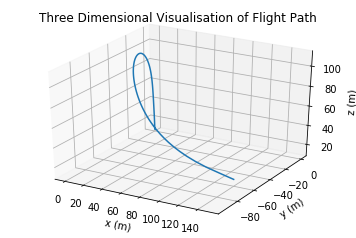

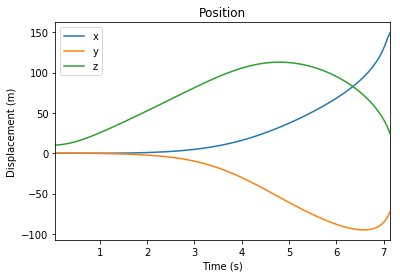

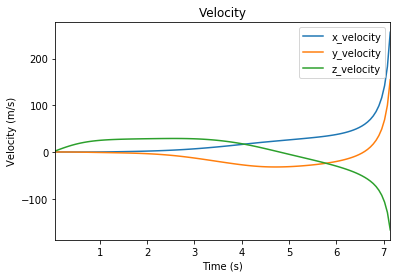

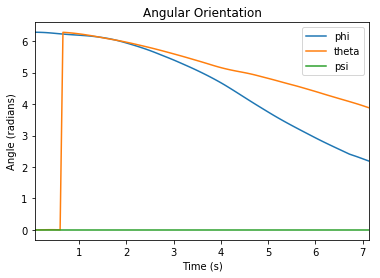

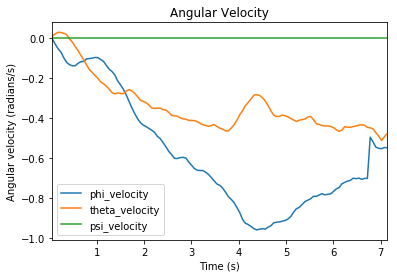

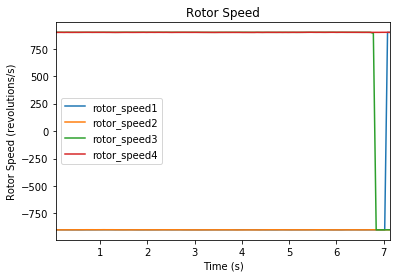

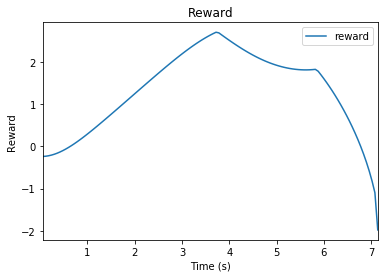

In [16]:
# Visualise the motion of the quadcopter.
# Take data from the last episode (there is a good chance this is amongst the best examples).
#visualise_quadcopter(final_results_file_and_path)
# Or to visualise a specific episode use something like this:
visualise_quadcopter('results/flighttime/episode1000.txt')

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

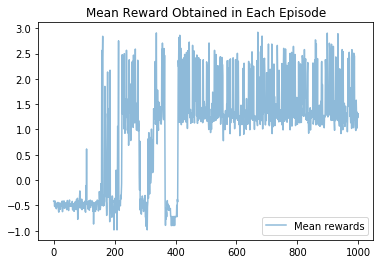

In [17]:
# Plot the mean reward in each episode
plot_mean_rewards(mean_rewards_file_and_path)

## Reflections
**Note** In the following questions I'll focus on the final model and task described in [2.4. Improved Model and Flight Time Task](#2.4.-Improved-Model-and-Flight-Time-Task) above. The earlier sections are a useful comparison but are ultimately just development leading up to the final task and model.

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 
The task has two aims:

1) fly up towards a target position and then remain flying near to the target position

2) continue flying without crashing or going out of bounds until the flight time is equal to the target runtime.

During training, we keep track of how many times the quadcopter is able to keep flying inbounds and without crashing for the full runtime. This should increase as training progresses if the model is successful.

The reward function has several elements:
* target_time_reward - A large reward for still being in flight after the total runtime.
* crash_penalty - A large penalty for crashing or flying out of bounds. This is reduced in size as flight time increases.
* x_position_reward, y_position_reward, z_position_reward - these are all awarded for proximity to the target position and they can all be positive (reward, if close to the target) or negative (penalty, if too far away). They all vary linearly and they are all normalised. The linearity should make the function simpler to learn and the normalisation should help avoid very large or very small gradients in the learning process.

These elements of the reward function should support each other because teaching the agent to fly the quadcopter within the environment boundaries will tend to lead to longer flight time. The reward function in class FlightTime()  is much more effective than the one in class Takeoff().

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
Used the DDPG Actor-Critic algorithm for the Flight Time problem.
The neural network architecture and hyperparameters are based on those in Lillicrap et al (https://arxiv.org/pdf/1509.02971.pdf) and also on the description by Patrick Emami here: http://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html. This architecture is a suitable choice because their results show that this architecture generalizes well to many simulated physical problems. Specific details of the network are:
* Two hidden layers in the actor network, of 400 and 300 units, with ReLU activation
* tanh activation at the final output layer of the actor
* Critic model consists of two parts: actions and states. The states part of the network has two hidden layers of 400 and 300 units. In the Lillicrap paper the actions part has just one hidden layer (300 units). However, in the Flight Time task my experiemnts showed the network was more effective if the actions part also had two hidden layers (400 and 300 units). The actions and states parts of the network are then added together.
* Batch normalization prior to each dense layer of the actor and prior to the first dense layer of the states part of the critic. No batch normalization in the actions part of the critic.
* Learning rates of 0.0001 (actor) and 0.001 (critic)
* Soft update $\tau$ of 0.001, replay buffer size of 1000000
* Ornstein-Uhlenbeck with parameters $\mu$ of 0, $\theta$ of 0.15, $\sigma$ of 0.2
* A small discount ($\gamma$ of 0.99). A small discount makes sense because we are aiming to encourage the agent to fly the quadcopter for as long as possible (the goal state is reaching the runtime without adverse termination).

This is a much more powerful and complicated network than the simple one used in sections 2.2. and 2.3. above. That network was much smaller (fewer units in each layer) and did not use batch normalization. It's clear that the more complicated network defined in AdvancedDDPG(), AdvancedActor() and AdvancedCritic() gives much better results, with much clearer evidence of learning and achieving the task.

In addition, I experimented with the following changes to the network (none of which improved performance in 500 episodes):
* Tried using dropout layers but this did not help. Overfitting is less of a problem in reinforcement learning problems than some other deep learning tasks, so this result makes sense.
* Tried increasing $\gamma$ to 1. This seemed reasonable, to emphasise the importance of the final state. However the system actually performed worse with $\gamma$ equal to 1.
* Tried setting to $\tau$ to 0.01. The agent was able to start achieving the target task more quickly but it was very unstable and soon stopped achieving it at all.
* Tried using a critic network where the actions part had one hidden layer layers. This model did not learn nearly as well as the final model I chose. 
* Tried changing the order of applying batch normalization (before or after the dense ReLU layers) in the actor and critic. This did not work at all - the network has to have batch normalization before the first hidden layer to the actor and the first hidden layer of the states part of the network or it just didn't learn.
* Tried different numbers of episodes. For the network in the Flight Time task, 500 seemed to be a reasonable minimum but improvements could still happen after further training.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
The task had two parts: 

1) flying within a certain distance of the target position

2) flying for the entire length of the runtime without crashing or going out of bounds.

The agent learned part 1 of the task quite well. It found a reasonably stable solution where it flew near the target position after around 400 episodes. So part 1 was reasonably easy.
The agent did not learn part 2 of the task so well. It did achieve the task with increasing frequency as training progressed but never really achieved a success rate better than about 20%. So part 2 was hard to learn reliably.

There definitely does seem to be an "aha" moment in reinforcement learning tasks, and in this case it seemed to come at about 400 episodes. Initially the agent appears not to be learning anything at all, and then it suddenly begins to learn. One of the major challenges is that even after this learning has started, it is often not very stable. This can be seen very clearly in the episode rewards plots above, as the agent varies between one solution and another.

The rewards plot shows that the agent definitely learned over the course of the training. Performance was ok for a simulation but is definitely not perfect and would not be good enough to use on a real quadcopter. The last 10 episodes give a returned reward in line with the solution found at about 400 episodes, and that is about 1.4-1.5.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of the project was writing the reward function. I went through many iterations of writing functions which I thought would reward the behaviour I wanted but inadvertently rewarded something unwanted. I also made the mistake of writing some reward functions which were far too complex, and often led to local minima where the behaviour would get trapped. For example, I experimented with a reward function that rewarded vertical position with a quadratic relationship. This sometimes produced a large upward velocity followed by a large negative velocity. The agent received a high reward because the quadcopter passed through the point of highest reward twice, but the problem was the large downward velocity often resulted in a crash immediately afterwards! Setting a reward function that used smooth linear functions and kept most values normalized to a small range was a big step forward.

Another challenge of this project is that there are so many factors (e.g. network architecture, hyperparameters, reward function) that can be changed and tuned in the system. Many are interrelated so it is often very difficult to know what should be changed to improve the performance. My approach to this was to start with the known network in the Lillicrap paper and then make small isolated changes, one at a time, to see what effect they had and evolve towards the best solution.

I spent a lot of time writing the code to train the agent and visualise the results. I think this was worthwhile because it made it much easier to run many experiments and compare the outcomes. Modularizing the code using child classes was also very useful to run experiments.

Definitely the learned behaviour of the quadcopter was interesting. When I started the project and some how the quadcopter was behaving - wildly different rotor speeds, a lot of angular velocity - I could see intuitively that it was not going to help the quadcopter fly well. I experimented with trying to control these factors directly in the reward function, for example by writing a penalty if the rotor blades had a speed very different from the average speed. I found that the agent did not perform very well with this penalty, so I removed it. However the much improved network in the AdvancedDDPG() class sometimes did something amazing: sometimes it learned to keep the rotor speeds similar by itself. This is without any direct reward or penalty on rotor speed.

It would be a major task to fully train the simulated quadcopter to handle all tasks (takeoff, landing, consider safety propperly, and so on). A very interesting future direction for this project would be to take a fully trained model (trained in simulation) and apply it to a real physical quadcopter. Transfer learning could be used to take the model from simulation and adapt to the real quadcopter. 